In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [72]:
import joblib
from category_encoders import BinaryEncoder
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

In [6]:
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'bwr' , font_scale = 1.1 , 
             rc = {'figure.figsize' : (8 , 4)})

In [8]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace = True, ignore_index = True)

In [13]:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [15]:
df['age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0


<AxesSubplot:xlabel='age'>

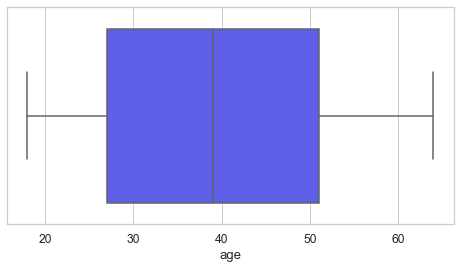

In [16]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

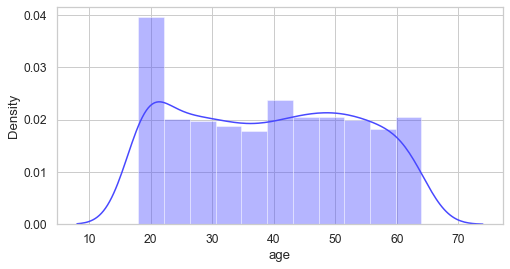

In [17]:
sns.distplot(df['age'])

In [18]:
df['sex'].value_counts().to_frame().T

,male,female
sex,675,662


<AxesSubplot:xlabel='sex', ylabel='count'>

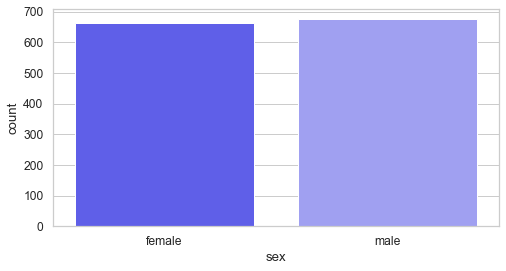

In [19]:
sns.countplot(df['sex'])

In [20]:
df['bmi'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
bmi,1337.0,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13


<AxesSubplot:xlabel='bmi'>

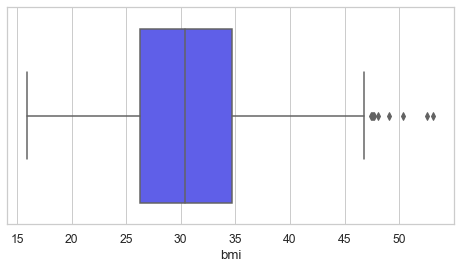

In [21]:
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

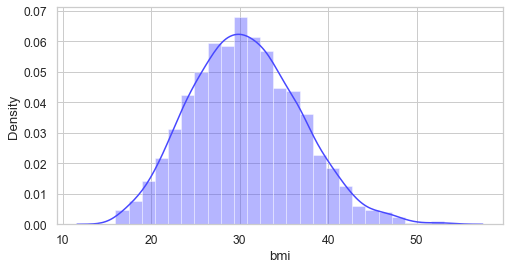

In [22]:
sns.distplot(df['bmi'])

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [24]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [25]:
df['children'].value_counts().to_frame().T

,0,1,2,3,4,5
children,573,324,240,157,25,18


<AxesSubplot:xlabel='children', ylabel='count'>

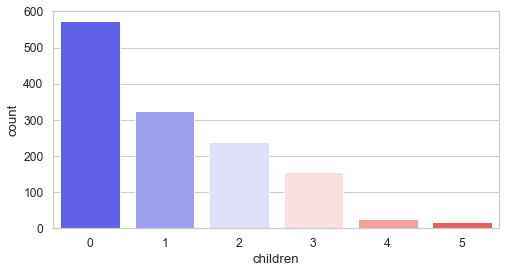

In [26]:
sns.countplot(df['children'])

In [28]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

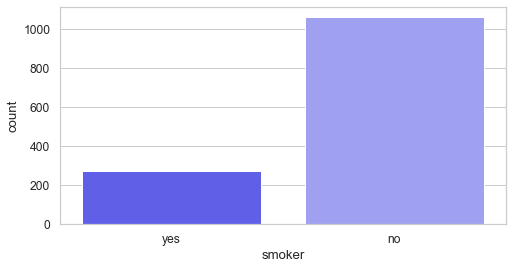

In [29]:
sns.countplot(df['smoker'])

In [30]:
df['region'].value_counts().to_frame().T

,southeast,southwest,northwest,northeast
region,364,325,324,324


<AxesSubplot:xlabel='region', ylabel='count'>

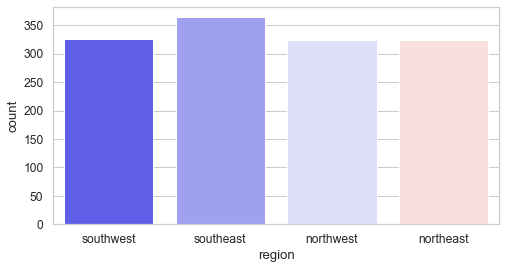

In [31]:
sns.countplot(df['region'])

In [32]:
df['charges'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<AxesSubplot:xlabel='charges'>

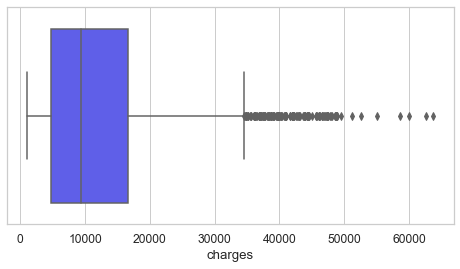

In [33]:
sns.boxplot(df['charges'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

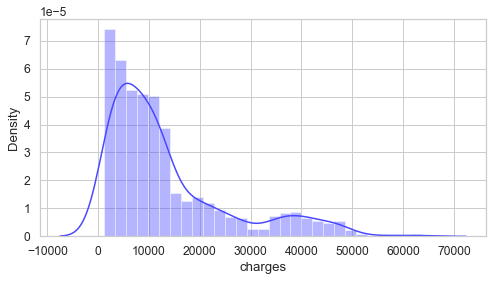

In [34]:
sns.distplot(df['charges'])

In [46]:
sex_mapper , smoker_mapper = {'male' : 1 , 'female' : 0} , {'yes' : 1 , 'no' : 0}

In [44]:
df['sex'] = df['sex'].map(sex_mapper)

In [47]:
df['smoker'] = df['smoker'].map(smoker_mapper)

In [50]:
encdr = BinaryEncoder()

In [52]:
df = pd.concat([df , encdr.fit_transform(df[['region']])] , axis = 1 )

In [53]:
df.drop(['region'] , axis = 1 , inplace = True)

In [54]:
df

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,1
4,32,1,28.880,0,0,3866.85520,0,1,1
...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,10600.54830,0,1,1
1333,18,0,31.920,0,0,2205.98080,1,0,0
1334,18,0,36.850,0,0,1629.83350,0,1,0
1335,21,0,25.800,0,0,2007.94500,0,0,1


In [57]:
df.drop(detect_outliers(df, 0 , ['bmi']) , inplace = True)

In [58]:
df.reset_index(inplace = True , drop = True)

In [79]:
x = df.drop(['charges'] , axis = 1)
y = np.log(df['charges'])

In [90]:
x_train , x_test , y_train , y_test = train_test_split(x , y 
                                                       , random_state = 4 , test_size = 0.20)

In [91]:
col_to_scl = ['age' , 'bmi']

In [92]:
sclr = RobustScaler()

In [93]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [94]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

In [95]:
model = LinearRegression()

In [96]:
model.fit(x_train , y_train )

LinearRegression()

In [97]:
y_pred = model.predict(x_test)

In [98]:
mean_squared_error(y_true = y_test , y_pred = y_pred , squared = False)

0.4673360766751074

In [99]:
r2_score(y_true = y_test , y_pred = y_pred)

0.7606860268023057

In [100]:
joblib.dump(model , 'model.pkl')

['model.pkl']

In [102]:
model.coef_

array([ 0.84490698, -0.09039971,  0.10054966,  0.10508758,  1.56418092,
        0.2123083 ,  0.09102074,  0.09450387])